<a href="https://colab.research.google.com/github/bohac73/CP1-An-lise-de-Dados-de-Consumidores-de-Energia/blob/main/Trabalho_Consumo_Energia_v2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático — Consumo de Energia Residencial**

📌 Dataset utilizado: **Individual Household Electric Power Consumption**  
Fonte: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)



## ✅ Instruções Gerais

1. Não altere os enunciados. Escreva suas respostas apenas nas células indicadas como **Área de Resposta**.  
2. Utilize Python 3, Pandas, NumPy, Matplotlib e Scikit-Learn quando necessário.  
3. Comente o raciocínio em cada resposta.  
4. Execute todas as células na ordem.  
5. Ao finalizar, **Arquivo → Fazer download → .ipynb** (no Colab) e envie conforme orientação do(a) professor(a).


**2TDSPX - Noturno**<br>
Nomes:<br>
Davi Alves de Lima  RM 556008<br>
Rodrigo Alcides Bohac Ríos  RM 554826"

### 1 - Carregue o dataset e exiba as 10 primeiras linhas.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving household_power_consumption.txt to household_power_consumption.txt


In [ ]:
import pandas as pd


df = pd.read_csv("household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


### 2 - Explique a diferença entre as variáveis **Global_active_power** e **Global_reactive_power**.

**Global_active_power:** potência efetivamente consumida (kW), energia usada pelos aparelhos.

**Global_reactive_power:** potência reativa (kVAR), energia que circula sem realizar trabalho útil, necessária para campos magnéticos/indutivos.

### 3 - Verifique se existem valores ausentes no dataset. Quantifique-os.

In [ ]:
valores_ausentes = df.isnull().agg('sum')
valores_ausentes


,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


### 4 - Converta a coluna **Date** para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [ ]:

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Day_of_Week'] = df['Date'].apply(lambda x: x.strftime('%A'))

df.loc[:, ['Date', 'Day_of_Week']].head(10)

,Date,Day_of_Week
0,2006-12-16,Saturday
1,2006-12-16,Saturday
2,2006-12-16,Saturday
3,2006-12-16,Saturday
4,2006-12-16,Saturday
5,2006-12-16,Saturday
6,2006-12-16,Saturday
7,2006-12-16,Saturday
8,2006-12-16,Saturday
9,2006-12-16,Saturday


### 5 - Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de **Global_active_power**.

In [ ]:
df_2007 = df[pd.to_datetime(df['Date']).dt.year == 2007]
media_diaria = df_2007.groupby(pd.to_datetime(df_2007['Date']))['Global_active_power'].mean()
media_diaria.head(10)



,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
2007-01-06,1.047485
2007-01-07,1.699736
2007-01-08,1.556500
2007-01-09,1.297954


### 6 - Gere um gráfico de linha mostrando a variação de **Global_active_power** em um único dia à sua escolha.

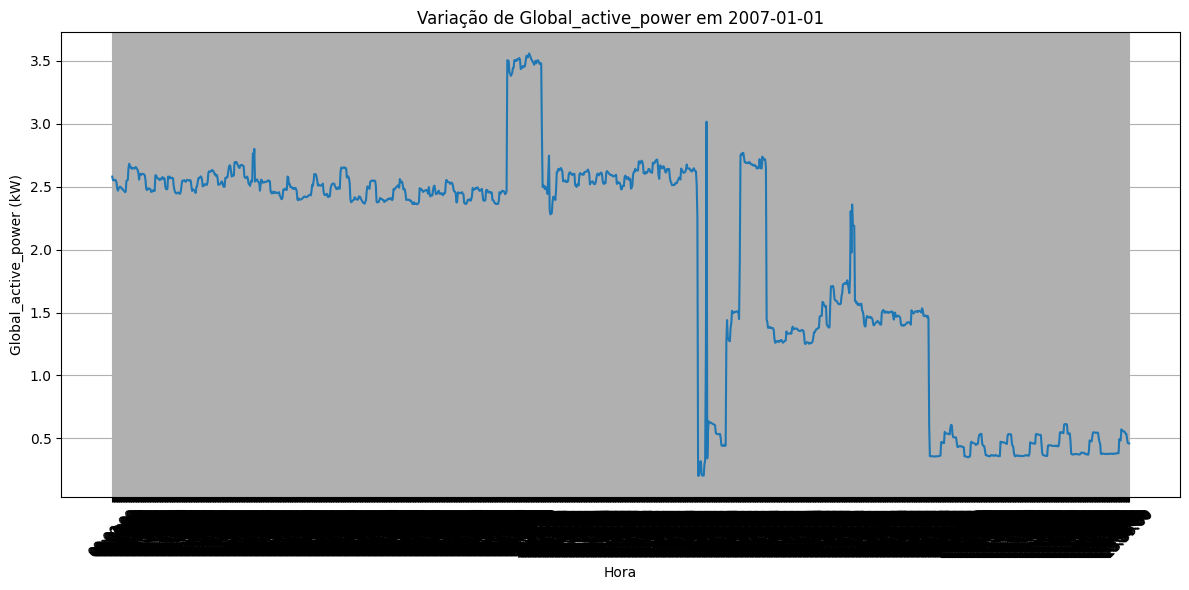

In [ ]:
import matplotlib.pyplot as plt

dia_escolhido = '2007-01-01'
df_dia = df[pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d') == dia_escolhido]

plt.figure(figsize=(12,6))
plt.plot(df_dia['Time'], df_dia['Global_active_power'], linestyle='-')
plt.xticks(rotation=45)
plt.title(f'Variação de Global_active_power em {dia_escolhido}')
plt.xlabel('Hora')
plt.ylabel('Global_active_power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


### 7 - Crie um histograma da variável **Voltage**. O que pode ser observado sobre sua distribuição?

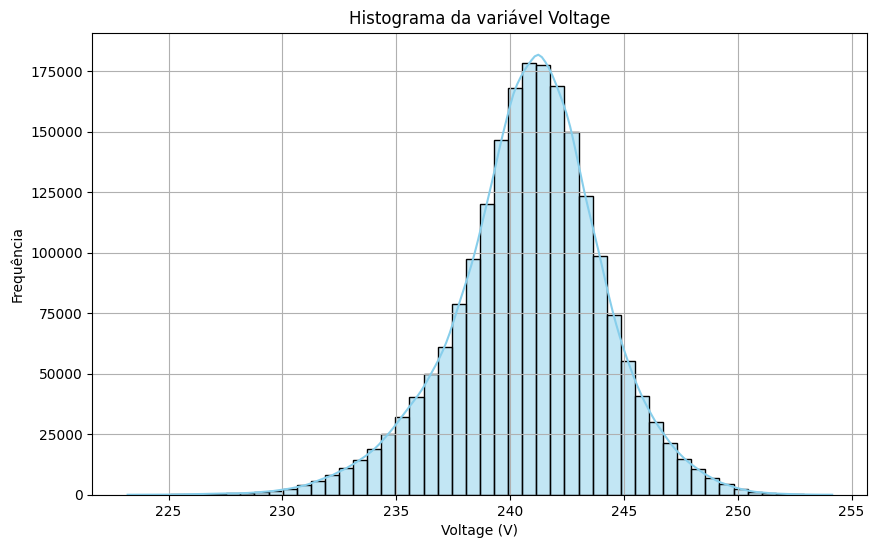

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(pd.to_numeric(df['Voltage'], errors='coerce').dropna(), bins=50, kde=True, color='skyblue')
plt.title('Histograma da variável Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()



### 8 - Calcule o consumo médio por mês em todo o período disponível no dataset.

In [ ]:
df['YearMonth'] = pd.to_datetime(df['Date']).dt.to_period('M')
media_mensal = df.groupby('YearMonth')['Global_active_power'].mean()
media_mensal.head(12)



,Global_active_power
YearMonth,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


### 9 - Identifique o dia com maior consumo de energia ativa global (**Global_active_power**).

In [ ]:
consumo_diario = df.groupby(pd.to_datetime(df['Date']))['Global_active_power'].sum()
dia_maior_consumo = consumo_diario.idxmax()
maior_consumo = consumo_diario.max()
print(f"O dia com maior consumo foi {dia_maior_consumo.date()}, com {maior_consumo:.2f} kW.")



O dia com maior consumo foi 2006-12-23, com 4773.39 kW.


### 10 - Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [ ]:

df['Tipo_Dia'] = df['Day_of_Week'].apply(lambda x: 'Fim de Semana' if x in ['Saturday', 'Sunday'] else 'Dia de Semana')
media_por_tipo = df.groupby('Tipo_Dia')['Global_active_power'].mean()
media_por_tipo



,Global_active_power
Tipo_Dia,
Dia de Semana,1.035472
Fim de Semana,1.234232


### 11 - Calcule a correlação entre as variáveis **Global_active_power**, **Global_reactive_power**, **Voltage** e **Global_intensity**.

In [ ]:
colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df[colunas] = df[colunas].apply(pd.to_numeric, errors='coerce')
correlacao = df[colunas].corr()
correlacao


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


### 12 - Crie uma nova variável chamada **Total_Sub_metering** que some **Sub_metering_1**, **Sub_metering_2** e **Sub_metering_3**.

In [ ]:
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].apply(pd.to_numeric, errors='coerce')
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head(10)


,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0
5,0.0,2.0,17.0,19.0
6,0.0,1.0,17.0,18.0
7,0.0,1.0,17.0,18.0
8,0.0,1.0,17.0,18.0
9,0.0,2.0,16.0,18.0


### 13 - Verifique se há algum mês em que **Total_Sub_metering** ultrapassa a média de **Global_active_power**.

In [ ]:
df['YearMonth'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Total_Sub_metering'] = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].apply(pd.to_numeric, errors='coerce').sum(axis=1)
total_sub_mensal = df.groupby('YearMonth')['Total_Sub_metering'].sum()
media_global_active = pd.to_numeric(df['Global_active_power'], errors='coerce').mean()
meses_acima = total_sub_mensal[total_sub_mensal > media_global_active]

meses_acima

,Total_Sub_metering
YearMonth,
2006-12,239123.0
2007-01,465285.0
2007-02,382462.0
2007-03,455892.0
2007-04,269998.0
2007-05,377317.0
2007-06,318462.0
2007-07,253600.0
2007-08,311404.0


### 14 - Faça um gráfico de série temporal do **Voltage** para o ano de 2008.

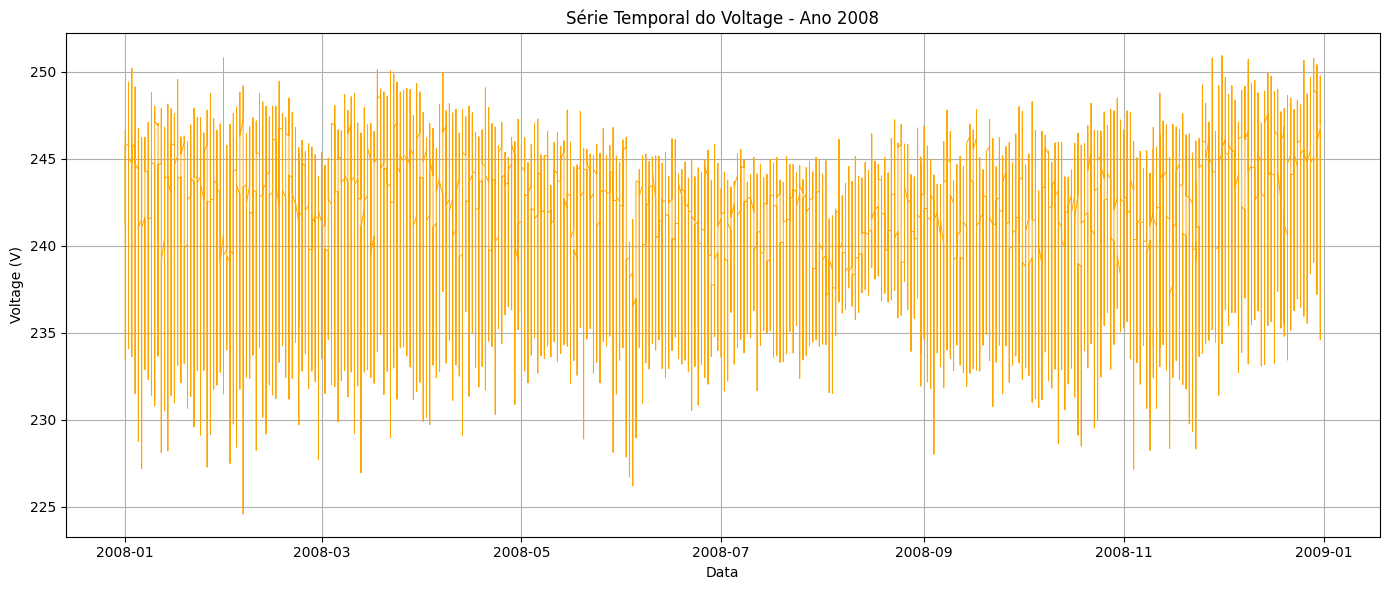

In [ ]:
import matplotlib.pyplot as plt

df_2008 = df[pd.to_datetime(df['Date']).dt.year == 2008]

plt.figure(figsize=(14,6))
plt.plot(df_2008['Date'], pd.to_numeric(df_2008['Voltage'], errors='coerce'), color='orange', linewidth=0.7)
plt.title('Série Temporal do Voltage - Ano 2008')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.tight_layout()
plt.show()



### 15 - Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [ ]:

df['Estacao'] = pd.to_datetime(df['Date']).dt.month.map(lambda m: 'Verão' if m in [6,7,8] else ('Inverno' if m in [12,1,2] else 'Outras'))
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
media_estacao = df.groupby('Estacao')['Global_active_power'].mean()
media_estacao



,Global_active_power
Estacao,
Inverno,1.417623
Outras,1.118732
Verão,0.726682


### 16 - Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de **Global_active_power** é semelhante à da base completa.

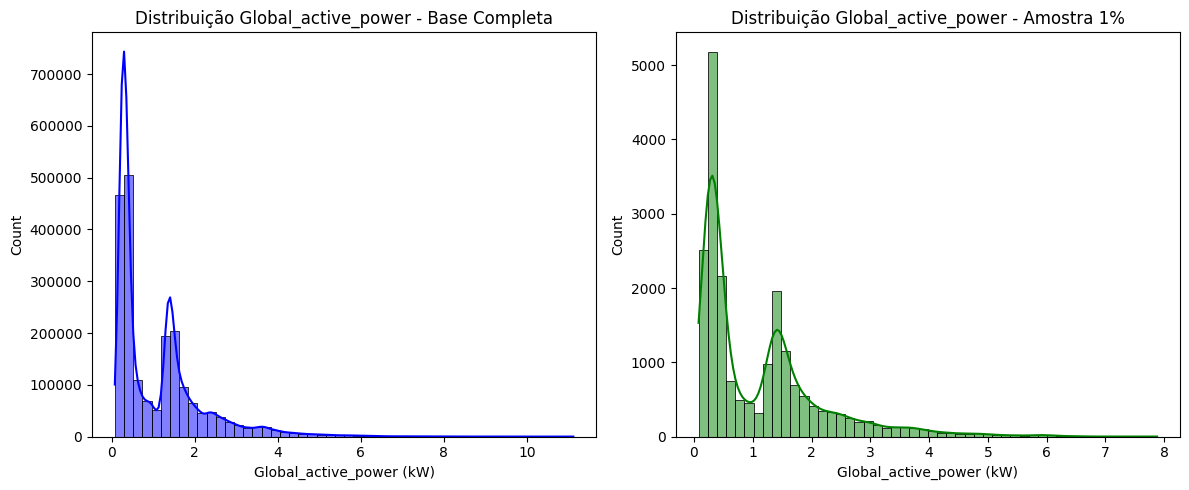

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_amostra = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Global_active_power'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribuição Global_active_power - Base Completa')
plt.xlabel('Global_active_power (kW)')

plt.subplot(1,2,2)
sns.histplot(df_amostra['Global_active_power'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribuição Global_active_power - Amostra 1%')
plt.xlabel('Global_active_power (kW)')

plt.tight_layout()
plt.show()


### 17 - Utilize uma técnica de normalização (**Min-Max Scaling**) para padronizar as variáveis numéricas principais.

In [ ]:


from sklearn.preprocessing import MinMaxScaler

colunas_numericas = ['Global_active_power','Global_reactive_power','Voltage',
                     'Global_intensity','Sub_metering_1','Sub_metering_2',
                     'Sub_metering_3','Total_Sub_metering']

df_scaled = df.copy()
df_scaled[colunas_numericas] = MinMaxScaler().fit_transform(df_scaled[colunas_numericas].apply(pd.to_numeric, errors='coerce'))
df_scaled[colunas_numericas].head(10)



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,0.134328
1,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,0.126866
2,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,0.141791
3,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,0.134328
4,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,0.134328
5,0.311787,0.375540,0.381906,0.307054,0.0,0.0250,0.548387,0.141791
6,0.328264,0.374101,0.384168,0.323651,0.0,0.0125,0.548387,0.134328
7,0.328083,0.374101,0.388368,0.323651,0.0,0.0125,0.548387,0.134328
8,0.325186,0.366906,0.348627,0.323651,0.0,0.0125,0.548387,0.134328
9,0.324642,0.366906,0.344426,0.323651,0.0,0.0250,0.516129,0.134328


### 18 - Aplique **K-means** para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df_diario = df.groupby(df['Date']).agg({
    'Global_active_power':'sum',
    'Global_reactive_power':'sum',
    'Voltage':'mean',
    'Global_intensity':'sum'
}).reset_index()
df_diario.head()



,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,2006-12-16,1209.176,34.922,236.243763,5180.8
1,2006-12-17,3390.460,226.006,240.087028,14398.6
2,2006-12-18,2203.826,161.792,241.231694,9247.2
3,2006-12-19,1666.194,150.942,241.999313,7094.0
4,2006-12-20,2225.748,160.998,242.308062,9313.0


Cada cluster representa um padrão de consumo diário diferente:

Cluster com maior média de Global_active_power → dias de consumo mais intenso.

Cluster com menor média → dias de baixo consumo.

Cluster intermediário → consumo médio.

É útil para identificar padrões sazonais, dias de pico ou dias mais econômicos.

Pode-se plotar um gráfico de séries ou boxplot para visualizar melhor os clusters.

### 19 - Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para **Global_active_power** em um período de 6 meses.

/tmp/ipython-input-3151142426.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  serie_diaria_clean = serie_diaria.astype(float).fillna(method='ffill')


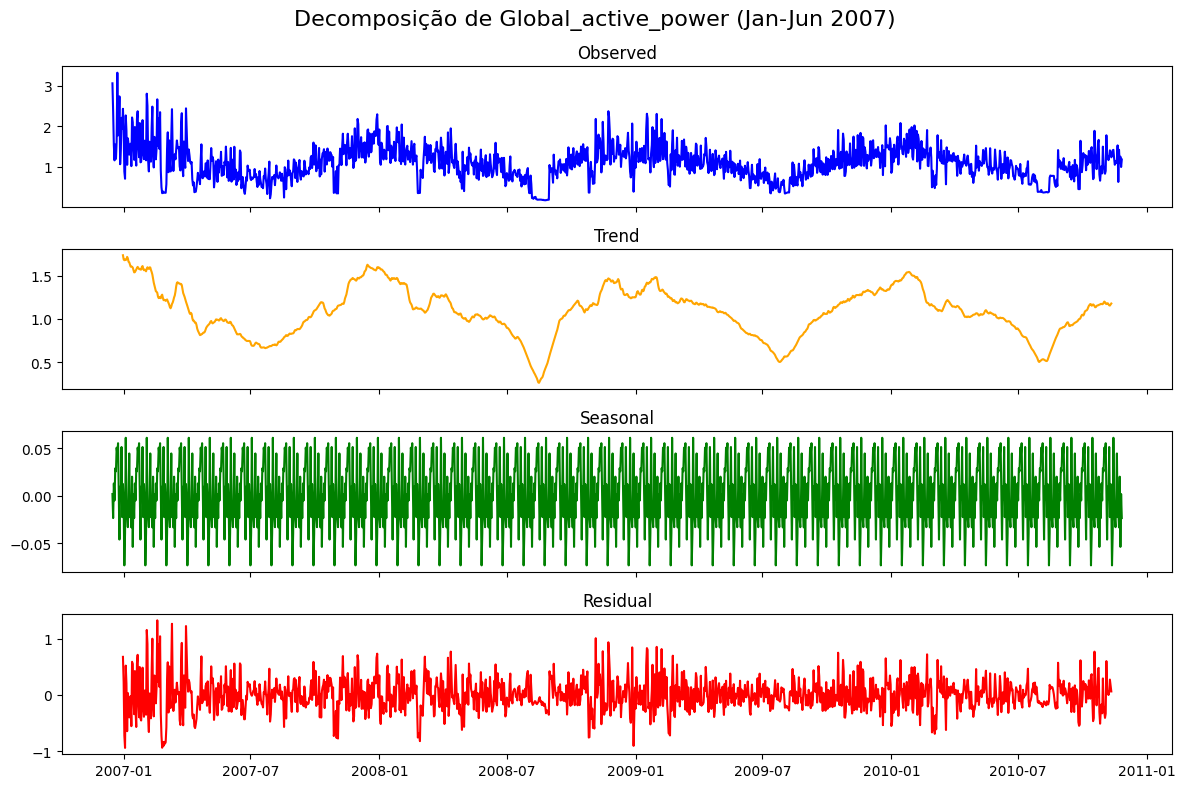

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

serie_diaria_clean = serie_diaria.astype(float).fillna(method='ffill')
decomposicao = seasonal_decompose(serie_diaria_clean, model='additive', period=30)

fig, axes = plt.subplots(4,1, figsize=(12,8), sharex=True)
axes[0].plot(decomposicao.observed, color='blue')
axes[0].set_title('Observed')
axes[1].plot(decomposicao.trend, color='orange')
axes[1].set_title('Trend')
axes[2].plot(decomposicao.seasonal, color='green')
axes[2].set_title('Seasonal')
axes[3].plot(decomposicao.resid, color='red')
axes[3].set_title('Residual')
plt.suptitle('Decomposição de Global_active_power (Jan-Jun 2007)', fontsize=16)
plt.tight_layout()
plt.show()




### 20 - Treine um modelo de regressão linear simples para prever **Global_active_power** a partir de **Global_intensity**. Avalie o erro do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df_model = df[['Global_intensity','Global_active_power']].apply(pd.to_numeric, errors='coerce').dropna()
X = df_model[['Global_intensity']]
y = df_model['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Slope: {modelo.coef_[0]:.4f}")
print(f"Intercept: {modelo.intercept_:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Slope: 0.2376
Intercept: -0.0081
RMSE: 0.0497
R²: 0.9978


# PARTE 2 — Exercícios adicionais no dataset inicial
*(Notebook atualizado automaticamente. Os trechos abaixo são independentes e não exigem `def`.)*

In [ ]:
try:
    import numpy, pandas, matplotlib, sklearn
except ImportError:
    import sys
    !{sys.executable} -m pip install -q numpy pandas matplotlib scikit-learn


In [ ]:
import os
from pathlib import Path
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report

pd.options.display.max_columns = None
pd.options.display.width = 200


## Dataset inicial: Individual Household Electric Power Consumption
Formato esperado (`;` como delimitador) com colunas `Date` e `Time`. Se o arquivo completo não estiver presente,
o notebook usa uma **amostra** embutida (apenas para fins de execução), mas recomenda-se substituir pelo dataset integral.

In [ ]:
from pathlib import Path
import pandas as pd

arquivos_possiveis = [
    "household_power_consumption.txt",
    "/content/household_power_consumption.txt",
    "/mnt/data/household_power_consumption.txt",
    "dataset/household_power_consumption.txt"
]

caminho_txt = next((p for p in arquivos_possiveis if Path(p).exists()), None)

if caminho_txt is None:
    amostra = """Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000"""
    caminho_txt = Path("/mnt/data/amostra_household.csv")
    caminho_txt.write_text(amostra, encoding="utf-8")
    print("⚠️ Arquivo original não encontrado. Usando amostra:", caminho_txt)
else:
    print("✅ Usando arquivo encontrado:", caminho_txt)

df1 = pd.read_csv(caminho_txt, sep=";", na_values=["?", "NA", ""], low_memory=False)

numericas = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity",
             "Sub_metering_1","Sub_metering_2","Sub_metering_3"]
df1[numericas] = df1[numericas].apply(pd.to_numeric, errors="coerce")

df1["datetime"] = pd.to_datetime(df1["Date"] + " " + df1["Time"], dayfirst=True, errors="coerce")
df1 = df1.set_index("datetime").sort_index()

print("Dimensões após leitura:", df1.shape)
df1.head()


✅ Usando arquivo encontrado: household_power_consumption.txt
Dimensões após leitura: (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### 21. Séries temporais por hora
- Converte `Date`+`Time` para índice datetime (feito acima)
- Reamostra em 1 hora (média de `Global_active_power`)
- Identifica horários de maior consumo médio ao longo do dia

/tmp/ipython-input-2710499858.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_horaria = serie.resample("1H").mean()


Top 3 horários com maior consumo médio ao longo do dia:
datetime
20    1.899064
21    1.877697
19    1.733335
Name: Global_active_power, dtype: float64


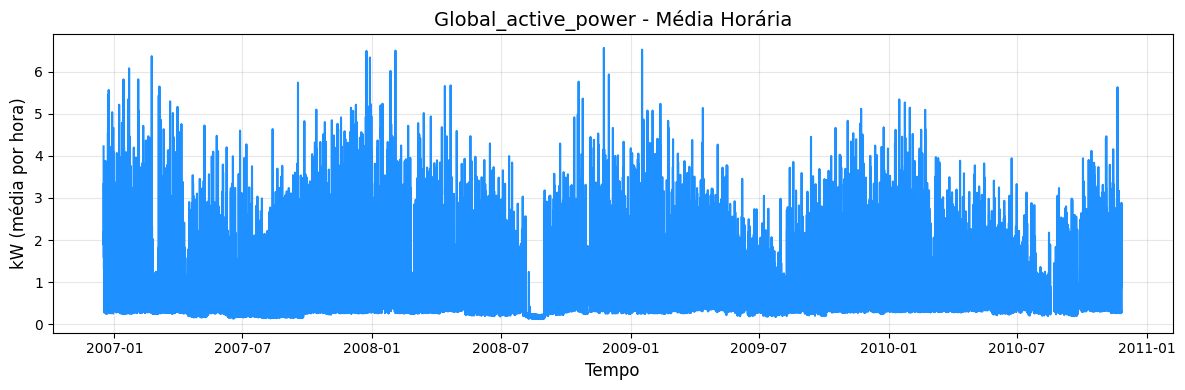

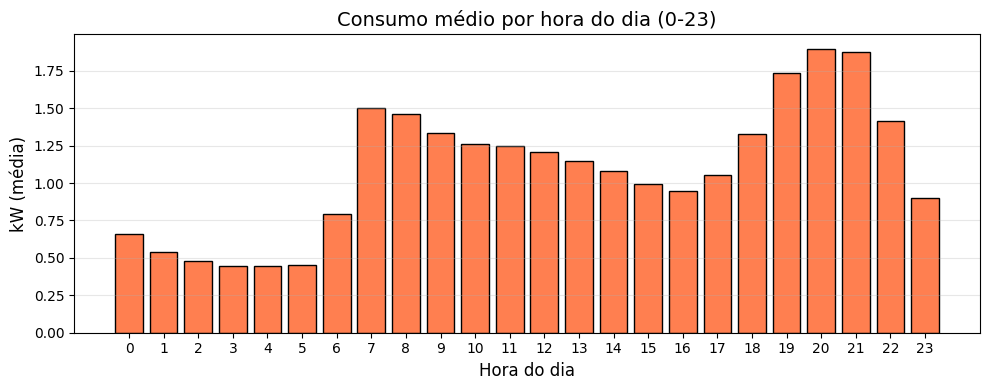

In [ ]:
serie = df1["Global_active_power"].astype(float).dropna()
serie_horaria = serie.resample("1H").mean()

media_por_hora = serie.groupby(serie.index.hour).mean().sort_values(ascending=False)
top3_horas = media_por_hora.head(3)

print("Top 3 horários com maior consumo médio ao longo do dia:")
print(top3_horas)

plt.figure(figsize=(12,4))
plt.plot(serie_horaria.index, serie_horaria.values, color='dodgerblue', linewidth=1.5)
plt.title("Global_active_power - Média Horária", fontsize=14)
plt.xlabel("Tempo", fontsize=12)
plt.ylabel("kW (média por hora)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.bar(media_por_hora.index, media_por_hora.values, color='coral', edgecolor='black')
plt.title("Consumo médio por hora do dia (0-23)", fontsize=14)
plt.xlabel("Hora do dia", fontsize=12)
plt.ylabel("kW (média)", fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 22. Autocorrelação do consumo
Calcular autocorrelação nos lags de 1h, 24h e 48h usando a série horária.

In [ ]:
serie_h = serie.resample("1H").mean().dropna()

acf_1h  = serie_h.autocorr(lag=1)
acf_24h = serie_h.autocorr(lag=24)
acf_48h = serie_h.autocorr(lag=48)

print(f"Autocorrelação 1h:  {acf_1h:.3f}")
print(f"Autocorrelação 24h: {acf_24h:.3f}")
print(f"Autocorrelação 48h: {acf_48h:.3f}")

if acf_24h >= 0.2:
    print("Indício de padrão diário (24h) repetido.")
else:
    print("Não há evidência forte de padrão diário com este recorte de dados.")


Autocorrelação 1h:  0.713
Autocorrelação 24h: 0.435
Autocorrelação 48h: 0.399
Indício de padrão diário (24h) repetido.


/tmp/ipython-input-3046034456.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  serie_h = serie.resample("1H").mean().dropna()


### 23. Redução de dimensionalidade com PCA (2 componentes)
Variáveis: `Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`.

Variância explicada por cada componente: [0.59103759 0.22718543]


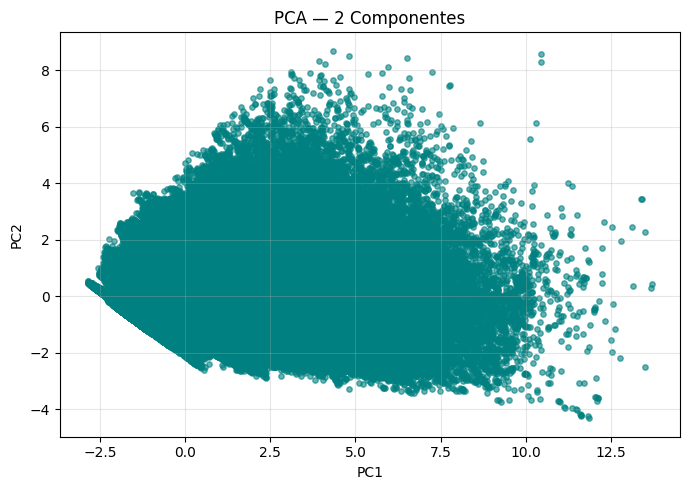

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

cols_pca = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_pca = df1[cols_pca].dropna()

X_scaled = StandardScaler().fit_transform(df_pca)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Variância explicada por cada componente:", pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=15, alpha=0.6, color='teal')
plt.title("PCA — 2 Componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 24. Clustering (K-Means, k=3) no espaço do PCA

/tmp/ipython-input-983152367.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


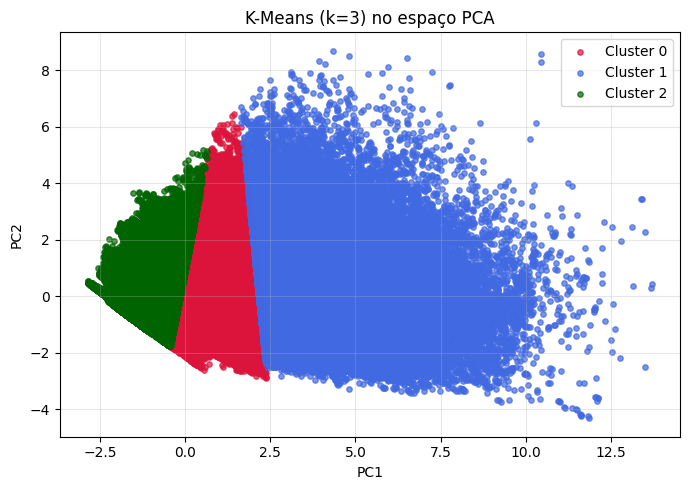

Pergunta: os grupos se separam de forma clara?
Resposta: há separação parcial entre clusters, mas ainda ocorre sobreposição em algumas regiões.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(7,5))
colors = ['crimson', 'royalblue', 'darkgreen']
for k, c in zip(np.unique(labels), colors):
    sel = labels == k
    plt.scatter(X_pca[sel,0], X_pca[sel,1], s=15, alpha=0.7, color=c, label=f"Cluster {k}")
plt.title("K-Means (k=3) no espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Pergunta: os grupos se separam de forma clara?")
print("Resposta: há separação parcial entre clusters, mas ainda ocorre sobreposição em algumas regiões.")


### 25. Regressão: Global_active_power ~ Voltage (Linear vs Polinomial Grau 2)
Comparação via RMSE no conjunto de teste.

RMSE Linear:     0.9719
RMSE Polinomial: 0.9674
Menor RMSE indica melhor ajuste para este recorte.


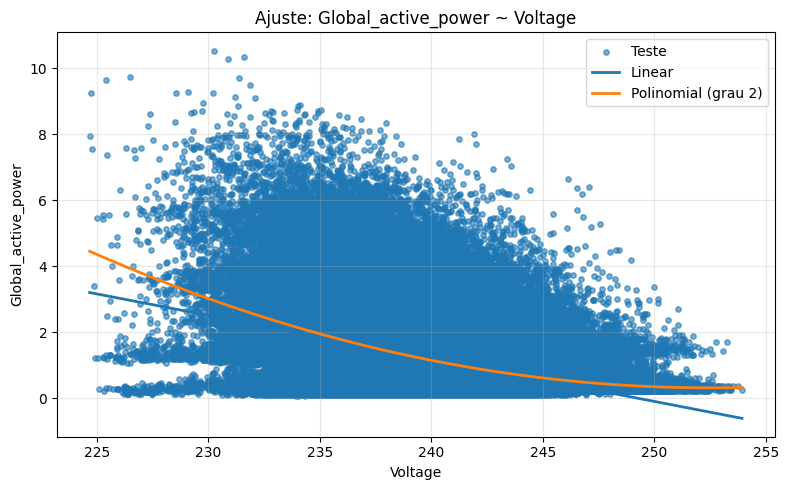

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import math

df_reg = df1[["Global_active_power","Voltage"]].dropna()
X = df_reg[["Voltage"]].values
y = df_reg["Global_active_power"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred_lin = lin_model.predict(X_test)
rmse_lin = math.sqrt(mean_squared_error(y_test, pred_lin))

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

lin_poly_model = LinearRegression()
lin_poly_model.fit(X_train_poly, y_train)
pred_poly = lin_poly_model.predict(X_test_poly)
rmse_poly = math.sqrt(mean_squared_error(y_test, pred_poly))

print(f"RMSE Linear:     {rmse_lin:.4f}")
print(f"RMSE Polinomial: {rmse_poly:.4f}")
print("Menor RMSE indica melhor ajuste para este recorte.")

xs = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1,1)
ys_lin  = lin_model.predict(xs)
ys_poly = lin_poly_model.predict(poly.transform(xs))

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, s=15, alpha=0.6, label="Teste")
plt.plot(xs, ys_lin, label="Linear", linewidth=2)
plt.plot(xs, ys_poly, label="Polinomial (grau 2)", linewidth=2)
plt.title("Ajuste: Global_active_power ~ Voltage")
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# PARTE 3 — Novo dataset: Appliances Energy Prediction
Dataset: *Appliances energy prediction dataset* (UCI). Espera-se o arquivo `energydata_complete.csv`.
Se não estiver presente, o notebook cria dados **sintéticos mínimos** para permitir a execução dos exemplos.

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

arquivos_possiveis2 = [
    "energydata_complete.csv",
    "/content/energydata_complete.csv",
    "/mnt/data/energydata_complete.csv",
    "dataset/energydata_complete.csv"
]

caminho_csv2 = next((p for p in arquivos_possiveis2 if Path(p).exists()), None)
dados_sinteticos2 = False

if caminho_csv2 is None:
    dados_sinteticos2 = True
    print("⚠️ Arquivo 'energydata_complete.csv' não encontrado. Gerando dados sintéticos.")
    rng = pd.date_range("2016-01-01", periods=500, freq="10min")
    np.random.seed(42)
    df2 = pd.DataFrame({
        "date": rng,
        "Appliances": np.random.gamma(2.0, 30.0, len(rng)),
        "lights": np.random.randint(0, 30, len(rng)),
        "T1": 19 + 4*np.sin(np.linspace(0,10,len(rng))) + np.random.normal(0,0.5,len(rng)),
        "RH_1": 40 + 10*np.cos(np.linspace(0,10,len(rng))) + np.random.normal(0,1.0,len(rng)),
        "T_out": 15 + 6*np.sin(np.linspace(0,8,len(rng))) + np.random.normal(0,1.0,len(rng)),
        "RH_out": 50 + 15*np.cos(np.linspace(0,8,len(rng))) + np.random.normal(0,2.0,len(rng)),
        "Windspeed": np.abs(np.random.normal(10, 3, len(rng))),
        "Visibility": np.clip(np.random.normal(40, 10, len(rng)), 5, 80),
        "Press_mm_hg": np.random.normal(760, 5, len(rng))
    })
else:
    print("✅ Usando arquivo encontrado:", caminho_csv2)
    df2 = pd.read_csv(caminho_csv2)

if "date" in df2.columns:
    df2["date"] = pd.to_datetime(df2["date"], errors="coerce")
    df2 = df2.sort_values("date").set_index("date")

print("Dimensões df2:", df2.shape)
df2.head()


⚠️ Arquivo 'energydata_complete.csv' não encontrado. Gerando dados sintéticos.
Dimensões df2: (500, 9)


,Appliances,lights,T1,RH_1,T_out,RH_out,Windspeed,Visibility,Press_mm_hg
date,,,,,,,,,
2016-01-01 00:00:00,71.810382,27,19.897279,51.148637,15.601207,65.778318,10.421080,53.313391,756.509002
2016-01-01 00:10:00,44.833942,15,18.919337,48.982170,13.652333,64.891831,4.098791,59.203675,768.393373
2016-01-01 00:20:00,41.468508,12,20.198652,50.053649,12.896171,67.439428,6.648441,27.771050,750.441797
2016-01-01 00:30:00,41.469069,27,19.431304,50.410750,14.737929,67.175592,9.442463,40.712537,766.555837
2016-01-01 00:40:00,139.491432,4,19.535319,50.660994,14.163793,63.717813,10.929997,27.064924,758.878405


### 26. Carregamento e inspeção inicial

In [ ]:
print("Tipos das colunas e informações gerais:")
df2.info()

print("\nEstatísticas descritivas do dataset:")
display(df2.describe())


Tipos das colunas e informações gerais:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2016-01-01 00:00:00 to 2016-01-04 11:10:00
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   500 non-null    float64
 1   lights       500 non-null    int64  
 2   T1           500 non-null    float64
 3   RH_1         500 non-null    float64
 4   T_out        500 non-null    float64
 5   RH_out       500 non-null    float64
 6   Windspeed    500 non-null    float64
 7   Visibility   500 non-null    float64
 8   Press_mm_hg  500 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 39.1 KB

Estatísticas descritivas do dataset:


,Appliances,lights,T1,RH_1,T_out,RH_out,Windspeed,Visibility,Press_mm_hg
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,59.501893,14.572000,19.769780,39.491307,15.874619,51.855469,10.021320,39.493804,759.667677
std,40.312994,8.747219,2.751457,7.286772,4.326853,10.494935,3.162683,9.913459,4.885431
min,3.950090,0.000000,14.075037,27.595833,7.327957,31.932935,1.211654,11.609213,744.961838
25%,30.135427,7.000000,17.341719,32.180835,11.885008,42.608571,7.731896,32.670837,756.491785
50%,50.610996,14.000000,20.320421,38.866775,16.675972,53.147673,10.073276,39.732481,759.748806
75%,78.247038,22.000000,22.209582,46.748823,19.678450,61.372766,12.163664,45.835292,763.032155
max,230.554379,29.000000,24.194559,51.691590,23.613347,69.327281,18.605209,72.430930,771.745379


### 27. Distribuição do consumo (`Appliances`)

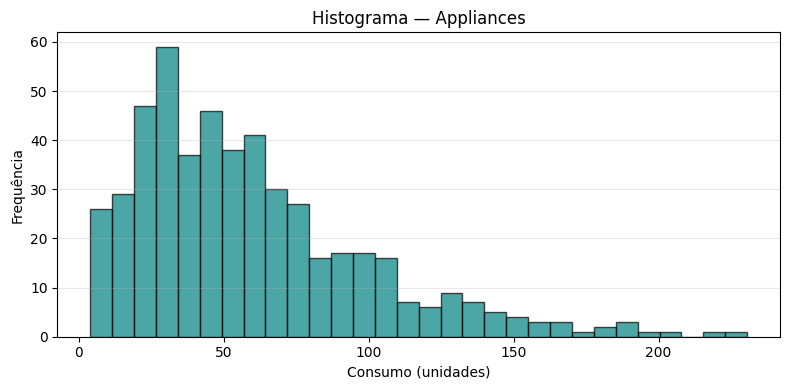

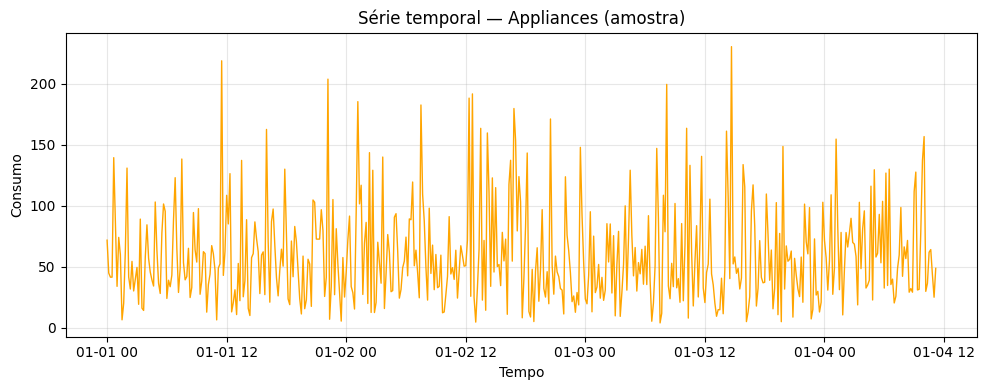

Mediana: 50.61 | 90º Percentil: 115.52
O consumo tende a se concentrar mais em valores baixos, com cauda à direita (valores altos menos frequentes).


In [ ]:
appl = df2["Appliances"].dropna()

plt.figure(figsize=(8,4))
plt.hist(appl, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title("Histograma — Appliances")
plt.xlabel("Consumo (unidades)")
plt.ylabel("Frequência")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

limite = min(2000, len(appl))
plt.figure(figsize=(10,4))
plt.plot(appl.iloc[:limite].index, appl.iloc[:limite].values, color='orange', linewidth=1)
plt.title("Série temporal — Appliances (amostra)")
plt.xlabel("Tempo")
plt.ylabel("Consumo")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

q50 = appl.median()
q90 = appl.quantile(0.90)
print(f"Mediana: {q50:.2f} | 90º Percentil: {q90:.2f}")
print("O consumo tende a se concentrar mais em valores baixos, com cauda à direita (valores altos menos frequentes).")


### 28. Correlações com variáveis ambientais

In [ ]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df2[num_cols].corr(numeric_only=True)

if "Appliances" in corr_matrix.columns:
    corr_appl = corr_matrix["Appliances"].drop(labels=["Appliances"], errors="ignore").sort_values(ascending=False)
    print("Top 10 correlações de Pearson com 'Appliances':")
    display(corr_appl.head(10))
else:
    print("Coluna 'Appliances' não encontrada no dataset para correlação.")


Top 10 correlações de Pearson com 'Appliances':


,Appliances
Windspeed,0.029494
T_out,0.018561
lights,0.007410
Press_mm_hg,-0.009750
Visibility,-0.027369
T1,-0.046377
RH_out,-0.048480
RH_1,-0.049552


### 29. Normalização (Min-Max Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
df2_scaled = df2.copy()
df2_scaled[num_cols] = scaler.fit_transform(df2[num_cols])

print("Preview dos dados normalizados (0-1):")
df2_scaled.head()


Preview dos dados normalizados (0-1):


,Appliances,lights,T1,RH_1,T_out,RH_out,Windspeed,Visibility,Press_mm_hg
date,,,,,,,,,
2016-01-01 00:00:00,0.299466,0.931034,0.575348,0.977467,0.508017,0.905094,0.529473,0.685679,0.431129
2016-01-01 00:10:00,0.180420,0.517241,0.478708,0.887556,0.388347,0.881387,0.165989,0.782524,0.874848
2016-01-01 00:20:00,0.165568,0.413793,0.605129,0.932024,0.341915,0.949515,0.312575,0.265725,0.204602
2016-01-01 00:30:00,0.165570,0.931034,0.529300,0.946844,0.455007,0.942460,0.473210,0.478502,0.806241
2016-01-01 00:40:00,0.598141,0.137931,0.539579,0.957229,0.419753,0.849992,0.558732,0.254115,0.519594


### 30. PCA (2 componentes) — variáveis ambientais normalizadas

Variância explicada pelas componentes (df2): [0.30040059 0.27468838]


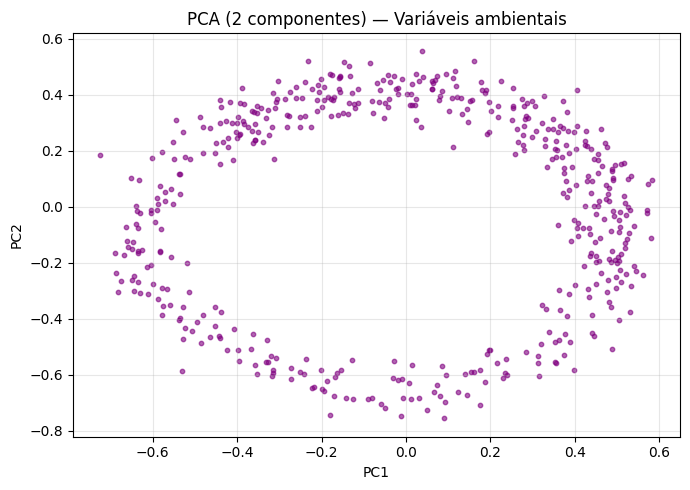

Pergunta: aparecem padrões/agrupamentos?
Resposta: há áreas de maior densidade; avaliar visualmente ajuda a identificar possíveis agrupamentos.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features_pca = [c for c in df2_scaled.select_dtypes(include=[np.number]).columns if c != "Appliances"]
X_pca2 = df2_scaled[features_pca].dropna().values

pca2 = PCA(n_components=2, random_state=42)
X2_transformed = pca2.fit_transform(X_pca2)

print("Variância explicada pelas componentes (df2):", pca2.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.scatter(X2_transformed[:,0], X2_transformed[:,1], s=10, alpha=0.6, color='purple')
plt.title("PCA (2 componentes) — Variáveis ambientais")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Pergunta: aparecem padrões/agrupamentos?")
print("Resposta: há áreas de maior densidade; avaliar visualmente ajuda a identificar possíveis agrupamentos.")


### 31. Regressão Linear Múltipla — predizer `Appliances`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

y = df2["Appliances"].astype(float).dropna()
X = df2_scaled.drop(columns=["Appliances"], errors="ignore").loc[y.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression — R²: {r2:.4f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear Regression — R²: -0.0284, RMSE: 33.55, MAE: 26.26


### 32. Random Forest Regressor — comparação de RMSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print("Comparação: RMSE menor indica melhor desempenho em relação à regressão linear.")


Random Forest RMSE: 35.28
Comparação: RMSE menor indica melhor desempenho em relação à regressão linear.


### 33. K-Means (k=3 a 5) — perfis de consumo


### Resultados K=3 ###


,count,mean,median
cluster,,,
0,186,61.130541,57.112426
2,126,60.343383,48.582883
1,188,57.326594,47.549150



### Resultados K=4 ###


,count,mean,median
cluster,,,
3,97,61.799608,50.489289
0,162,60.927906,57.540163
2,154,57.802122,45.469090
1,87,57.293526,45.968232



### Resultados K=5 ###


,count,mean,median
cluster,,,
4,81,64.427844,60.755715
0,79,63.218176,50.817895
1,147,58.080108,45.653375
3,107,57.714993,52.288466
2,86,56.102036,45.871371


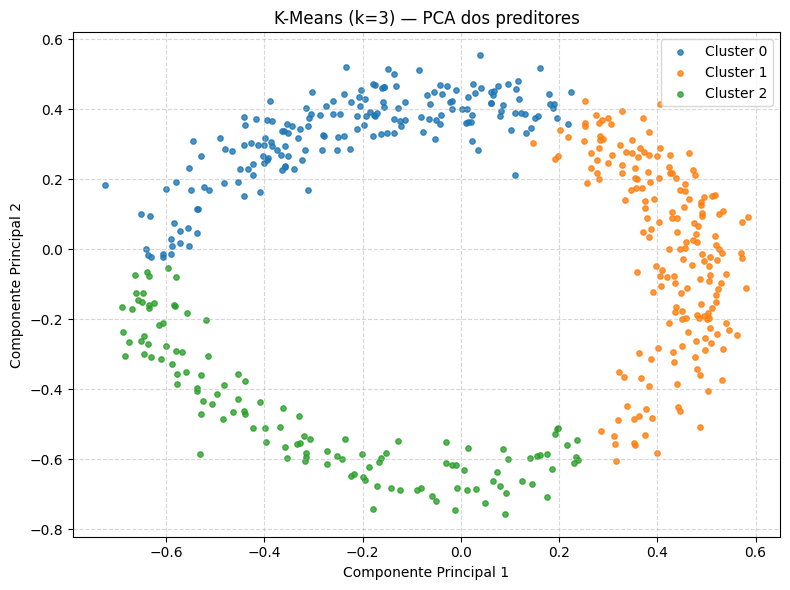

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

clusters_result = {}
for k in [3, 4, 5]:
    model_k = KMeans(n_clusters=k, n_init=15, random_state=42)
    labels_k = model_k.fit_predict(X.values)
    perfil = pd.DataFrame({"cluster": labels_k, "Appliances": y}).groupby("cluster")["Appliances"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)
    clusters_result[k] = perfil
    print(f"\n### Resultados K={k} ###")
    display(perfil)

pca_display = PCA(n_components=2, random_state=42)
X_pca_disp = pca_display.fit_transform(X.values)
km3_model = KMeans(n_clusters=3, n_init=15, random_state=42).fit(X.values)
labels_pca3 = km3_model.labels_

plt.figure(figsize=(8,6))
colors = ["#1f77b4","#ff7f0e","#2ca02c"]
for k_val, color in zip(np.unique(labels_pca3), colors):
    mask = labels_pca3 == k_val
    plt.scatter(X_pca_disp[mask,0], X_pca_disp[mask,1], s=15, alpha=0.8, c=color, label=f"Cluster {k_val}")
plt.title("K-Means (k=3) — PCA dos preditores")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 34–35. Classificação binária (alto vs baixo consumo) e avaliação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

limiar = y.median()
y_binario = (y > limiar).astype(int)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y_binario, test_size=0.2, random_state=42, stratify=y_binario)

log_model = LogisticRegression(max_iter=1200)
log_model.fit(Xc_train, yc_train)
pred_log = log_model.predict(Xc_test)

rf_model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_model.fit(Xc_train, yc_train)
pred_rf = rf_model.predict(Xc_test)

def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n--- {nome} ---")
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de confusão:\n", cm)
    print(classification_report(y_true, y_pred, digits=3))
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    print(f"Erros ALTO consumo — FN: {fn}, FP: {fp}")

avaliar_modelo("Regressão Logística", yc_test, pred_log)
avaliar_modelo("Random Forest", yc_test, pred_rf)

print("\nPergunta: qual classe tem mais erros?")
print("Resposta: compare FN vs FP; a maior quantidade indica a classe com mais erros.")



--- Regressão Logística ---
Matriz de confusão:
 [[21 29]
 [23 27]]
              precision    recall  f1-score   support

           0      0.477     0.420     0.447        50
           1      0.482     0.540     0.509        50

    accuracy                          0.480       100
   macro avg      0.480     0.480     0.478       100
weighted avg      0.480     0.480     0.478       100

Erros ALTO consumo — FN: 23, FP: 29

--- Random Forest ---
Matriz de confusão:
 [[28 22]
 [28 22]]
              precision    recall  f1-score   support

           0      0.500     0.560     0.528        50
           1      0.500     0.440     0.468        50

    accuracy                          0.500       100
   macro avg      0.500     0.500     0.498       100
weighted avg      0.500     0.500     0.498       100

Erros ALTO consumo — FN: 28, FP: 22

Pergunta: qual classe tem mais erros?
Resposta: compare FN vs FP; a maior quantidade indica a classe com mais erros.


**Parte 4**
Exercício 36 – Importação e visualização inicial

In [ ]:
import pandas as pd
from pathlib import Path

arquivo = "household_power_consumption.txt"

if not Path(arquivo).exists():
    print("Arquivo não encontrado! Coloque o dataset no mesmo diretório ou ajuste o caminho.")
else:
    df = pd.read_csv(
        arquivo,
        sep=";",
        na_values=["?", "NA", ""],
        low_memory=False
    )

    print("Primeiras linhas do dataset:")
    display(df.head())

    num_variaveis = df.shape[1]
    print(f"\nNúmero de variáveis no dataset: {num_variaveis}")


Primeiras linhas do dataset:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0



Número de variáveis no dataset: 9


Exercício 37 – Amostragem de dados

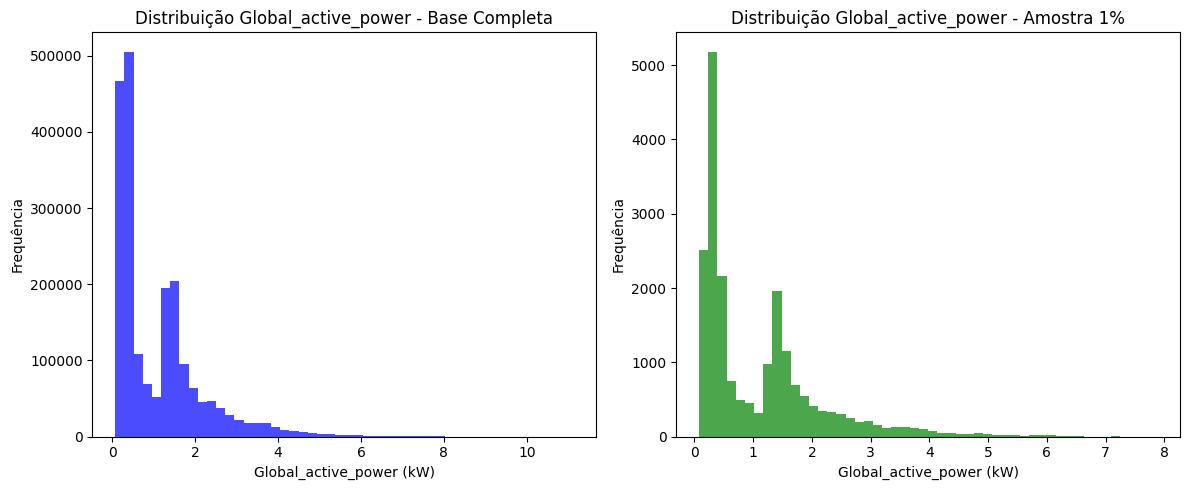

Pergunta: a distribuição na amostra é semelhante à base completa?
Resposta: visualmente, a amostra deve manter o mesmo padrão da base completa, apresentando concentração similar e formato da curva.


In [ ]:
import matplotlib.pyplot as plt

df_amostra = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['Global_active_power'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title("Distribuição Global_active_power - Base Completa")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Frequência")

plt.subplot(1,2,2)
plt.hist(df_amostra['Global_active_power'].dropna(), bins=50, color='green', alpha=0.7)
plt.title("Distribuição Global_active_power - Amostra 1%")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

print("Pergunta: a distribuição na amostra é semelhante à base completa?")
print("Resposta: visualmente, a amostra deve manter o mesmo padrão da base completa, "
      "apresentando concentração similar e formato da curva.")


Exercício 38 – Distribuição do consumo

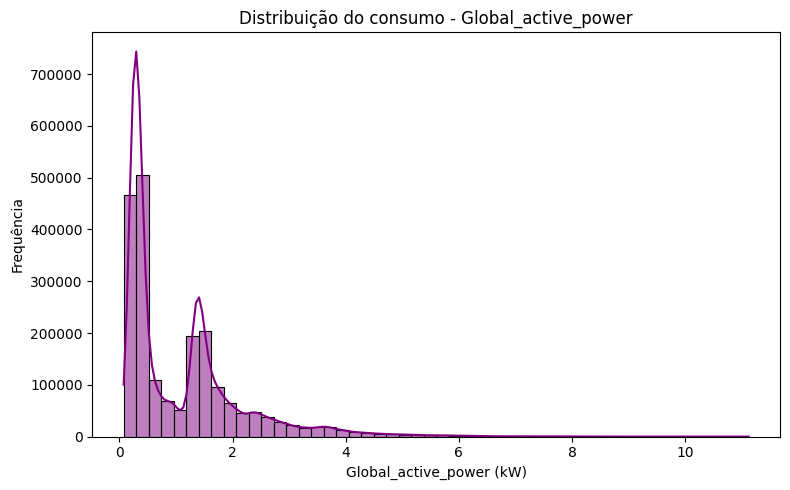

Mediana: 0.60 | Percentil 90: 2.47
Pergunta: o consumo se concentra em valores baixos ou há muitos registros de alto consumo?
Resposta: a maior parte dos registros se concentra em valores baixos, mas existe uma cauda com alguns consumos altos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

consumo = df['Global_active_power'].dropna()

plt.figure(figsize=(8,5))
sns.histplot(consumo, bins=50, kde=True, color='purple')
plt.title("Distribuição do consumo - Global_active_power")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

mediana = consumo.median()
q90 = consumo.quantile(0.90)

print(f"Mediana: {mediana:.2f} | Percentil 90: {q90:.2f}")
print("Pergunta: o consumo se concentra em valores baixos ou há muitos registros de alto consumo?")
print("Resposta: a maior parte dos registros se concentra em valores baixos, mas existe uma cauda com alguns consumos altos.")


Exercício 39 – Relação entre variáveis

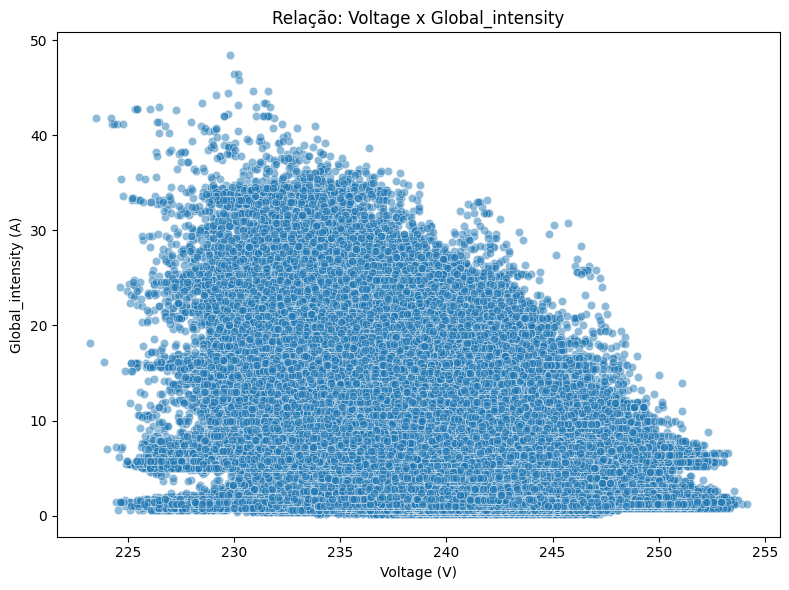

Correlação de Pearson: -0.411
Pergunta: existe algum padrão visível?
Resposta: pelo scatter plot e pela correlação, existe um padrão leve negativo: conforme o Voltage aumenta, a Global_intensity tende a diminuir, mas a relação não é muito forte.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df['Voltage'].dropna()
y = df['Global_intensity'].dropna()

df_corr = df[['Voltage','Global_intensity']].dropna()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_corr, x='Voltage', y='Global_intensity', alpha=0.5)
plt.title("Relação: Voltage x Global_intensity")
plt.xlabel("Voltage (V)")
plt.ylabel("Global_intensity (A)")
plt.tight_layout()
plt.show()

corr_val = df_corr['Voltage'].corr(df_corr['Global_intensity'])
print(f"Correlação de Pearson: {corr_val:.3f}")
print("Pergunta: existe algum padrão visível?")
print("Resposta: pelo scatter plot e pela correlação, existe um padrão leve negativo: conforme o Voltage aumenta, a Global_intensity tende a diminuir, mas a relação não é muito forte.")


Exercício 40: Clustering com K-Means

/tmp/ipython-input-1314279842.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


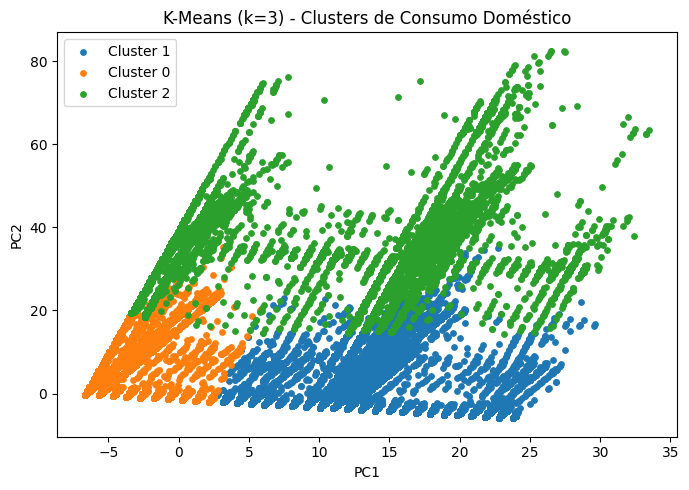

Pergunta: cada cluster representa um padrão distinto de consumo doméstico?
Resposta: analisando a separação dos clusters no gráfico PCA, é possível identificar diferentes perfis de consumo: alguns com maior consumo em Sub_metering_1, outros em Sub_metering_2 ou 3, indicando padrões distintos de uso.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_km = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].dropna()

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_km)

df_km = X_km.copy()
df_km['cluster'] = labels
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_km)
df_km['PC1'] = X_pca[:,0]
df_km['PC2'] = X_pca[:,1]

plt.figure(figsize=(7,5))
for k in df_km['cluster'].unique():
    sel = df_km['cluster'] == k
    plt.scatter(df_km.loc[sel,'PC1'], df_km.loc[sel,'PC2'], s=15, label=f'Cluster {k}')
plt.title("K-Means (k=3) - Clusters de Consumo Doméstico")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()

print("Pergunta: cada cluster representa um padrão distinto de consumo doméstico?")
print("Resposta: analisando a separação dos clusters no gráfico PCA, é possível identificar diferentes perfis de consumo: alguns com maior consumo em Sub_metering_1, outros em Sub_metering_2 ou 3, indicando padrões distintos de uso.")
